In [1]:
import m_nn, d_mg5_data
import torch
import pennylane as qml
from pennylane import numpy as np

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [2]:
d = d_mg5_data.FatJetEvents(channel="VzToZhToVevebb", cut_pt=(800, 1000), subjet_radius=0.1, num_pt_ptcs=4)
e = d.generate_uniform_pt_events(bin=10, num_bin_data=10)

DataLog: Now loading hdf5 file VzToZhToVevebb|c800_1000_r0.1.hdf5
DataLog: Successfully loading hdf5 file VzToZhToVevebb|c800_1000_r0.1.hdf5
DataLog: Generate uniform Pt events (1/10) | number of bin events = 10/11075
DataLog: Generate uniform Pt events (2/10) | number of bin events = 10/11328
DataLog: Generate uniform Pt events (3/10) | number of bin events = 10/11761
DataLog: Generate uniform Pt events (4/10) | number of bin events = 10/11922
DataLog: Generate uniform Pt events (5/10) | number of bin events = 10/11775
DataLog: Generate uniform Pt events (6/10) | number of bin events = 10/11568
DataLog: Generate uniform Pt events (7/10) | number of bin events = 10/11036
DataLog: Generate uniform Pt events (8/10) | number of bin events = 10/10258
DataLog: Generate uniform Pt events (9/10) | number of bin events = 10/8917
DataLog: Generate uniform Pt events (10/10) | number of bin events = 10/7399


In [3]:
gnn_idx_qubits = 2
def ctrl_enc_operator(_input, control, control_values):
    qml.Hadamard(wires=gnn_idx_qubits)
    ctrl = qml.ctrl(qml.Rot, control=control, control_values=control_values)
    ctrl(theta=_input[0], phi=_input[1], omega=_input[2], wires=gnn_idx_qubits)

model = m_nn.QuantumDisorderedFCGraph(num_idx_qubits=gnn_idx_qubits, num_nn_qubits=2, num_layers=1, num_reupload=1, ctrl_enc_operator=ctrl_enc_operator)

(<Figure size 2100x500 with 1 Axes>, <Axes: >)

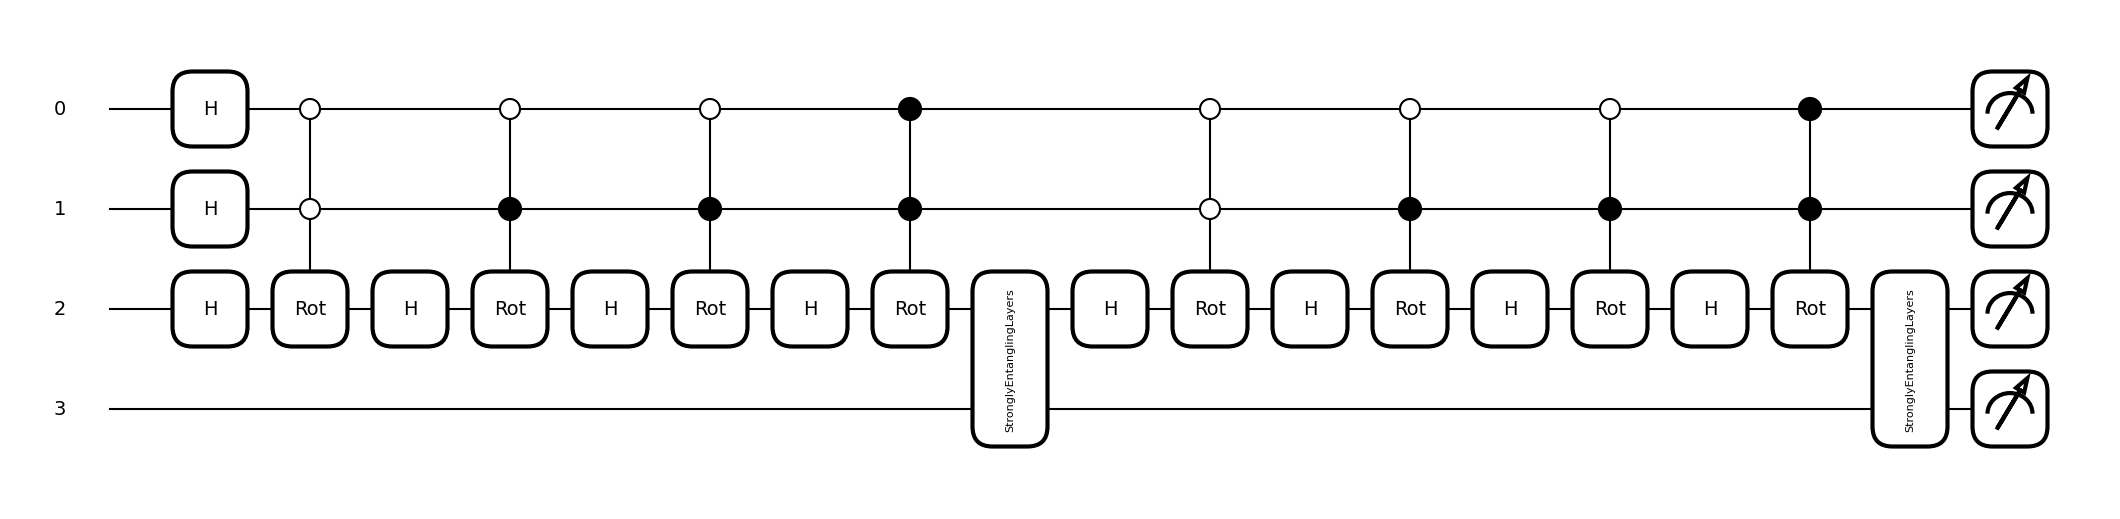

In [10]:
qml.draw_mpl(model.circuit)(torch.rand(4,3), torch.rand(1+1, 1, 2, 3))

In [15]:
data = torch.rand(4, 3).reshape(-1)
print(model(data))

data[3:] = torch.zeros(9)
print(model(data))

tensor([2.3771, 1.6939], grad_fn=<SumBackward1>)
tensor([2.0705, 1.0380], grad_fn=<SumBackward1>)
